In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
def plot_improvements(xlsx_path, algorithm_type, commodity_type):
    # Load the data
    df = pd.read_excel(xlsx_path)

    # Clean up column names by stripping any leading/trailing spaces
    df.columns = df.columns.str.strip()

    # Filter based on the algorithm type
    df = df[df['Algorithm'] == algorithm_type]

    # Group data by 'Model'
    grouped = df.groupby('Model')

    # Plotting separate charts for Precision and Recall
    for name, group in grouped:
        # Remove NaN values and check if data is valid
        prec_data = group['Precision Improvement (%)'].dropna()
        rec_data = group['Recall Improvement (%)'].dropna()

        if prec_data.empty or rec_data.empty or prec_data.nunique() == 1 or rec_data.nunique() == 1:
            continue  # Skip this plot if data is insufficient or non-variable

        fig, ax1 = plt.subplots(figsize=(10, 5))

        color = 'tab:red'
        ax1.set_xlabel('Threshold')
        ax1.set_ylabel('Precision Improvement (%)', color=color)
        ax1.plot(group['Threshold'], prec_data, label='Precision Improvement (%)', marker='o', color=color)
        ax1.tick_params(axis='y', labelcolor=color)
        
        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        color = 'tab:blue'
        ax2.set_ylabel('Recall Improvement (%)', color=color)  # we already handled the x-label with ax1
        ax2.plot(group['Threshold'], rec_data, label='Recall Improvement (%)', marker='o', color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        # Title and grid
        plt.title(f'[{commodity_type}] Precision and Recall Improvement vs. Threshold for {name} using {algorithm_type}')
        ax1.grid(True)

        # Show plot
        fig.tight_layout()  
        plt.show()



In [56]:
TYPE = 'threshold'
ALGORITHM = ['correction', 'detection_correction']

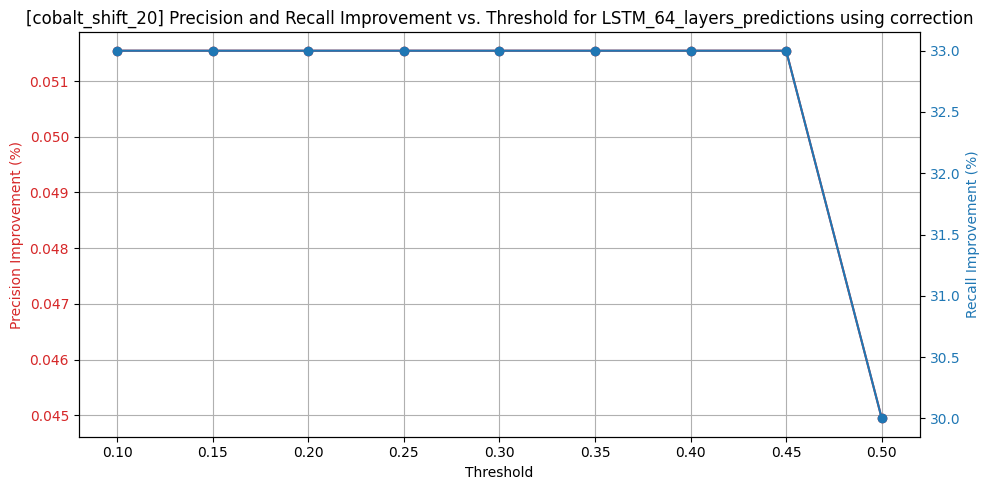

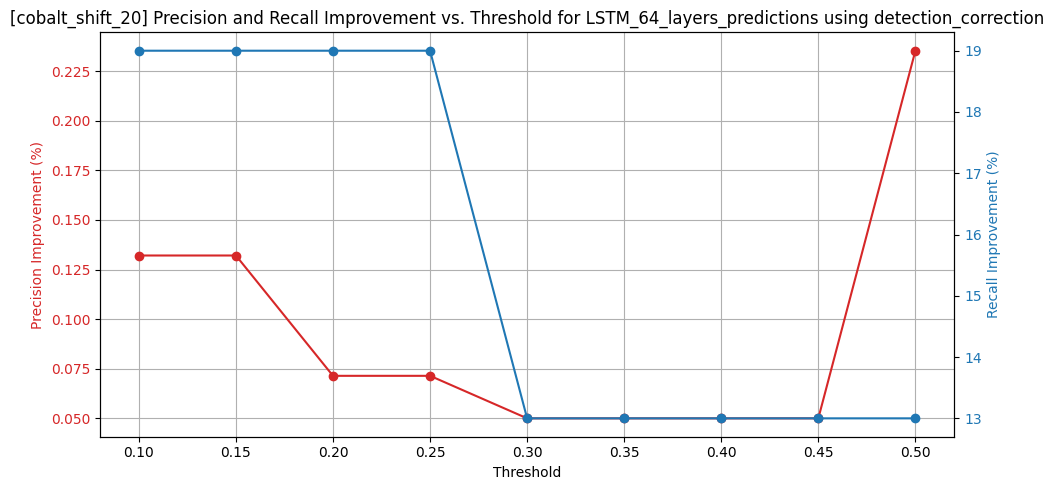

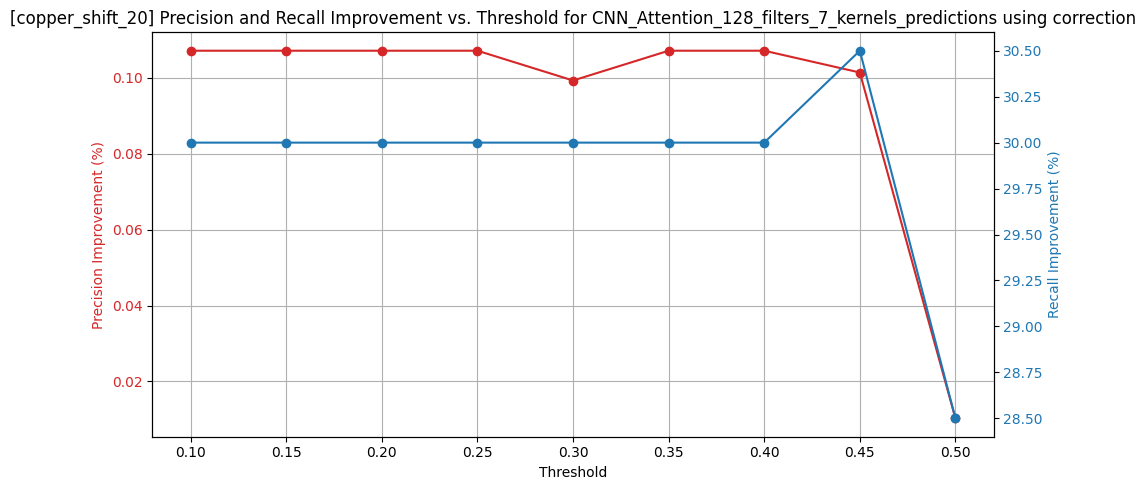

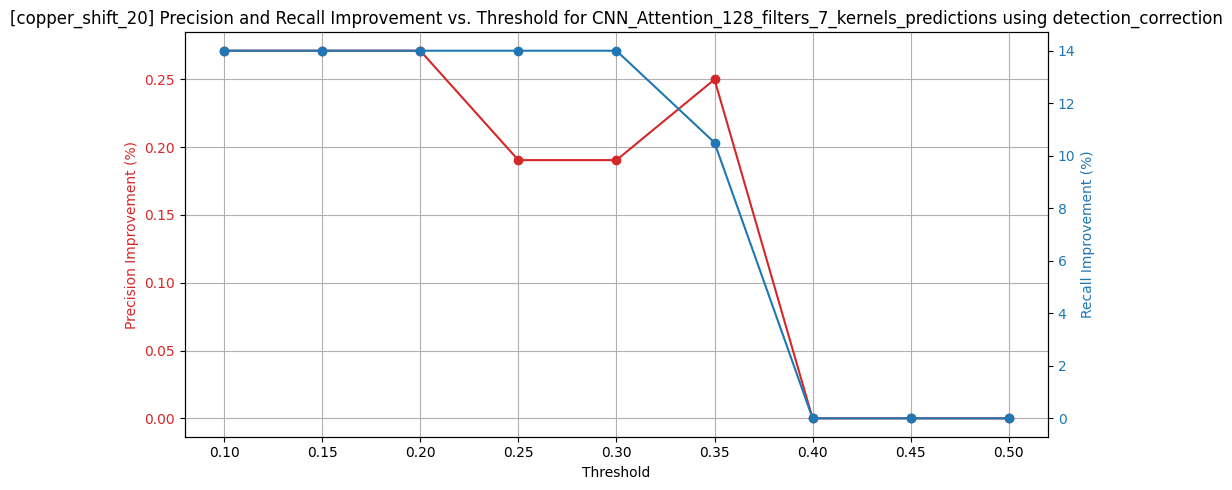

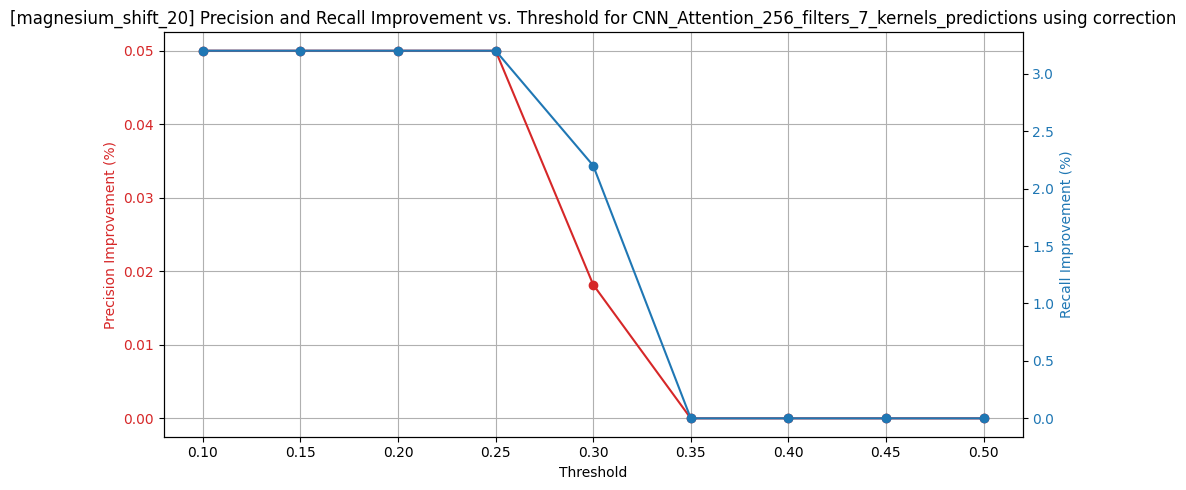

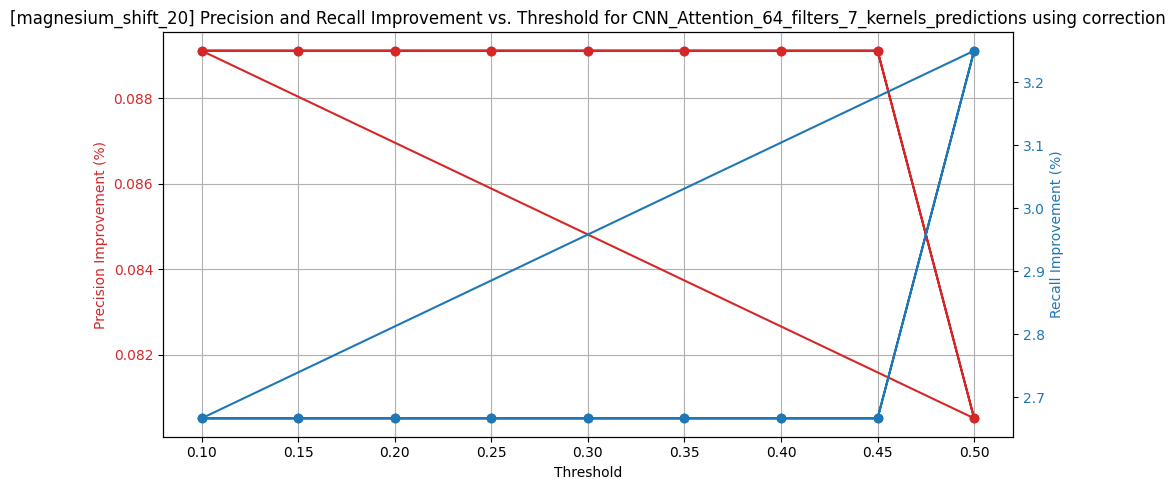

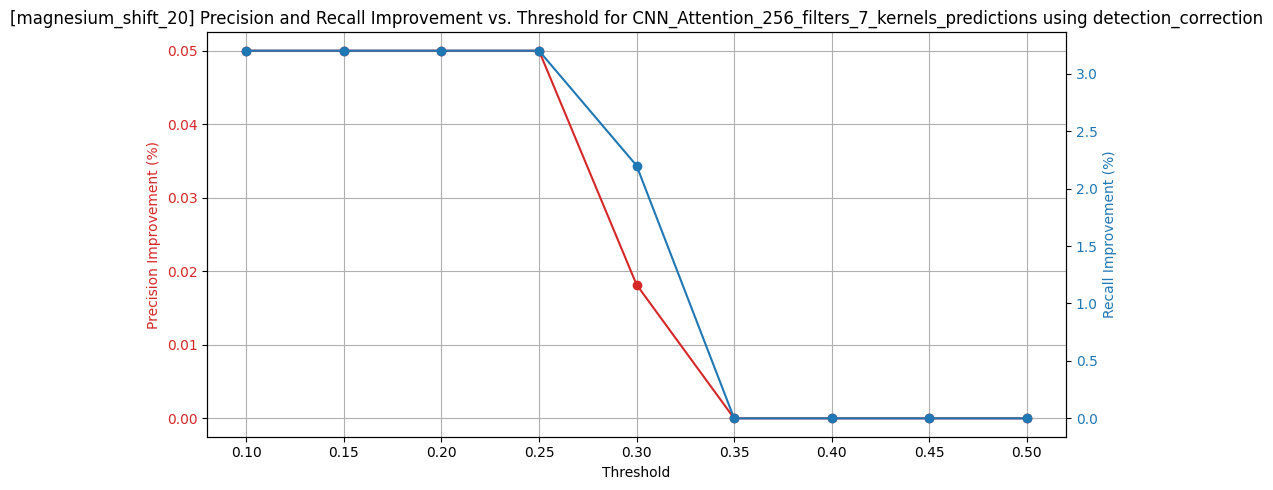

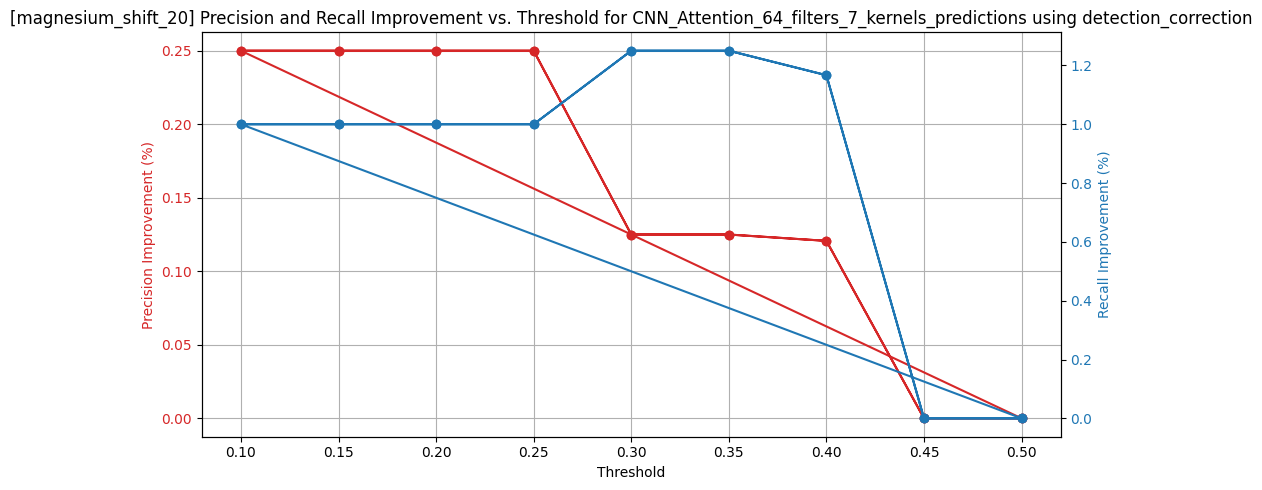

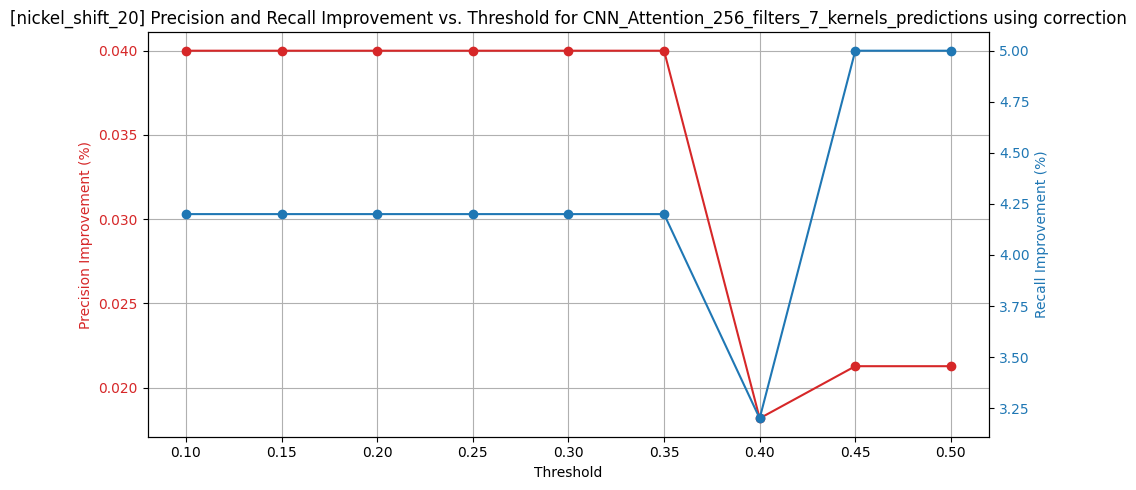

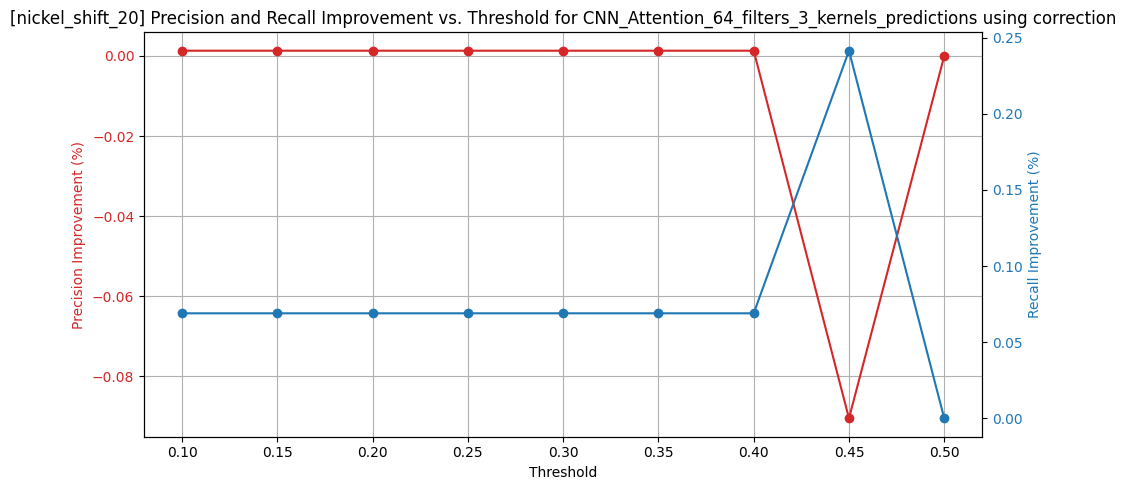

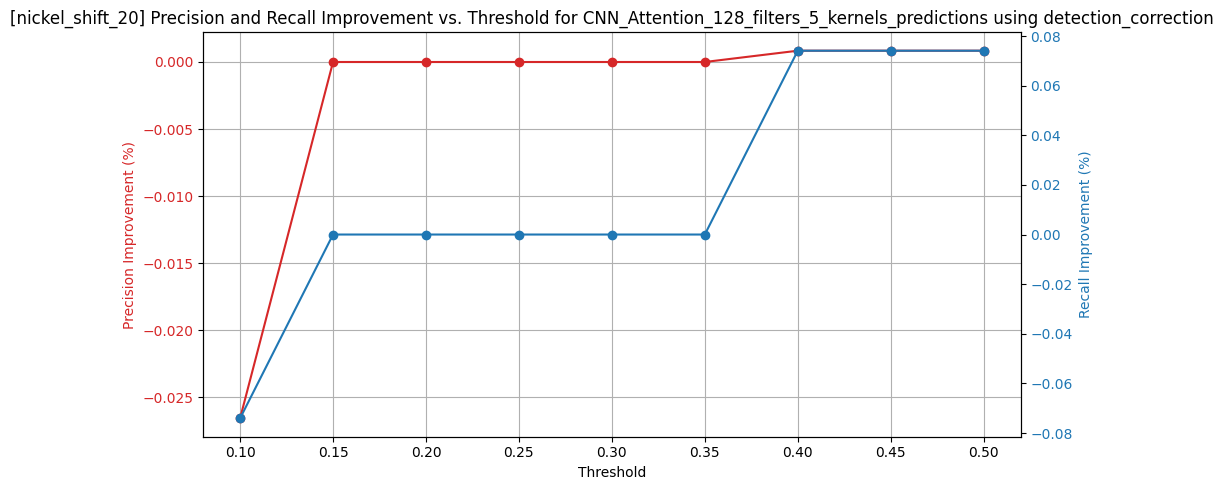

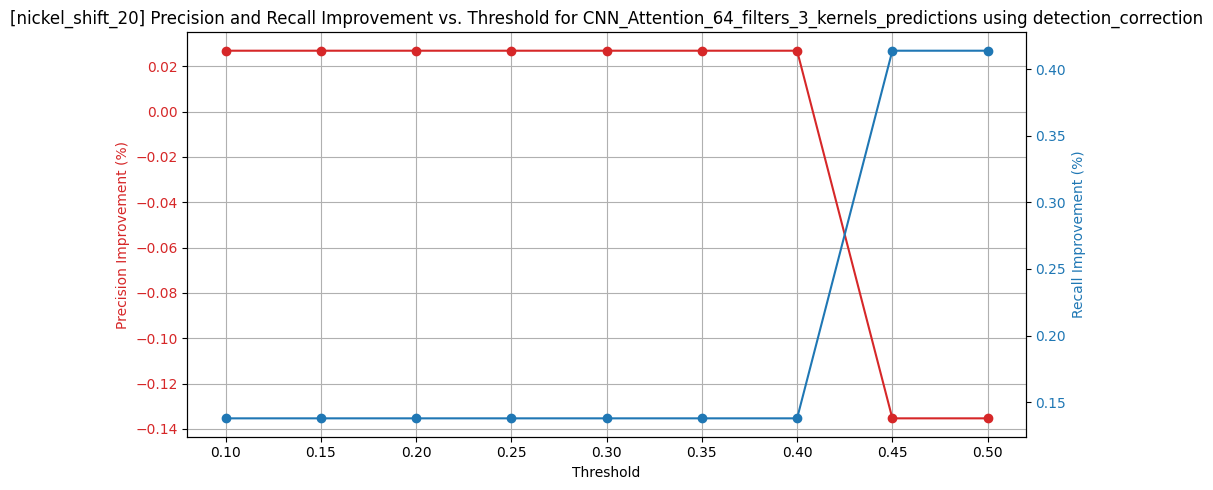

In [57]:
for COMMODITY in [
  'cobalt_shift_20', 'copper_shift_20', 'magnesium_shift_20', 'nickel_shift_20',
]:
    for ALGO in ['correction', 'detection_correction']:
        path = f'out/{TYPE}/{COMMODITY}_results.xlsx'
        plot_improvements(path, ALGO, COMMODITY)